In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. unpack our lat_lngs zip object into a list
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
len(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | caravelas
Processing Record 2 of Set 1 | menongue
Processing Record 3 of Set 1 | barrow
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | bogo
Processing Record 6 of Set 1 | rio de jesus
Processing Record 7 of Set 1 | lavrentiya
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | padang
Processing Record 10 of Set 1 | anjiang
Processing Record 11 of Set 1 | upernavik
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | mosquera
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | sola
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | shar
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | ahipara
Processing Record 21 of Set 1 | malchevskaya
Processing Record 22 of Set 1 | batetskiy
Processing Record 23 of Set 1 | busselton
Processing Re

Processing Record 38 of Set 4 | diego de almagro
Processing Record 39 of Set 4 | yashkul
Processing Record 40 of Set 4 | nuuk
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | maputo
Processing Record 43 of Set 4 | karkaralinsk
City not found. Skipping...
Processing Record 44 of Set 4 | iqaluit
Processing Record 45 of Set 4 | ijaki
City not found. Skipping...
Processing Record 46 of Set 4 | yangmei
Processing Record 47 of Set 4 | solsvik
City not found. Skipping...
Processing Record 48 of Set 4 | bonnyville
Processing Record 49 of Set 4 | stornoway
Processing Record 50 of Set 4 | coahuayana
Processing Record 1 of Set 5 | mount isa
Processing Record 2 of Set 5 | bukama
Processing Record 3 of Set 5 | shuangyang
Processing Record 4 of Set 5 | oranjemund
Processing Record 5 of Set 5 | qaqortoq
Processing Record 6 of Set 5 | van buren
Processing Record 7 of Set 5 | agapovka
Processing Record 8 of Set 5 | rovaniemi
Processing Record 9 of 

Processing Record 23 of Set 8 | port pirie
Processing Record 24 of Set 8 | den helder
Processing Record 25 of Set 8 | ponta delgada
Processing Record 26 of Set 8 | ilebo
Processing Record 27 of Set 8 | rumoi
Processing Record 28 of Set 8 | high level
Processing Record 29 of Set 8 | odienne
Processing Record 30 of Set 8 | lodja
Processing Record 31 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 32 of Set 8 | dudinka
Processing Record 33 of Set 8 | buchanan
Processing Record 34 of Set 8 | machilipatnam
Processing Record 35 of Set 8 | dharchula
Processing Record 36 of Set 8 | bafq
Processing Record 37 of Set 8 | spirovo
Processing Record 38 of Set 8 | coquimbo
Processing Record 39 of Set 8 | burica
City not found. Skipping...
Processing Record 40 of Set 8 | chumikan
Processing Record 41 of Set 8 | lolua
City not found. Skipping...
Processing Record 42 of Set 8 | vila franca do campo
Processing Record 43 of Set 8 | benjamin constant
Processing Record 44 of Set 8 | buala

Processing Record 10 of Set 12 | muyezerskiy
Processing Record 11 of Set 12 | shakawe
Processing Record 12 of Set 12 | pop
Processing Record 13 of Set 12 | pevek
Processing Record 14 of Set 12 | tafresh
Processing Record 15 of Set 12 | trincomalee
Processing Record 16 of Set 12 | terrace
Processing Record 17 of Set 12 | rajshahi
Processing Record 18 of Set 12 | alice springs
Processing Record 19 of Set 12 | zhetysay
Processing Record 20 of Set 12 | loukhi
Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | pacific grove
Processing Record 23 of Set 12 | maghama
City not found. Skipping...
Processing Record 24 of Set 12 | upington
Processing Record 25 of Set 12 | dano
Processing Record 26 of Set 12 | saint-joseph
Processing Record 27 of Set 12 | mikhaylovka
Processing Record 28 of Set 12 | kresek
Processing Record 29 of Set 12 | mayumba
Processing Record 30 of Set 12 | shache
Processing Record 31 of Set 12 | samarai
Processing Record 32 of Set 12 | sao gabriel da cacho

563

In [6]:
len(city_data)

563

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Caravelas,-17.7125,-39.2481,73.65,87,99,12.82,BR,2021-04-07 23:19:28
1,Menongue,-14.6585,17.6910,62.46,69,74,3.04,AO,2021-04-07 23:19:29
2,Barrow,71.2906,-156.7887,-18.40,63,90,10.36,US,2021-04-07 23:19:29
3,Provideniya,64.3833,-173.3000,3.20,66,0,8.95,RU,2021-04-07 23:19:29
4,Bogo,11.0517,124.0055,79.29,74,85,6.62,PH,2021-04-07 23:19:30
5,Rio De Jesus,7.9844,-81.1631,83.37,64,98,6.78,PA,2021-04-07 23:19:30
6,Lavrentiya,65.5833,-171.0000,-1.41,78,50,5.95,RU,2021-04-07 23:19:30
7,Hobart,-42.8794,147.3294,64.40,59,0,10.36,AU,2021-04-07 23:19:31
8,Padang,-0.9492,100.3543,75.20,100,40,2.30,ID,2021-04-07 23:19:31
9,Anjiang,27.3194,110.1031,51.84,96,64,3.00,CN,2021-04-07 23:19:31


In [8]:
# Reorder the column order
new_column_order = ["City", "Country", "Date", "Lat","Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Caravelas,BR,2021-04-07 23:19:28,-17.7125,-39.2481,73.65,87,99,12.82
1,Menongue,AO,2021-04-07 23:19:29,-14.6585,17.6910,62.46,69,74,3.04
2,Barrow,US,2021-04-07 23:19:29,71.2906,-156.7887,-18.40,63,90,10.36
3,Provideniya,RU,2021-04-07 23:19:29,64.3833,-173.3000,3.20,66,0,8.95
4,Bogo,PH,2021-04-07 23:19:30,11.0517,124.0055,79.29,74,85,6.62


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

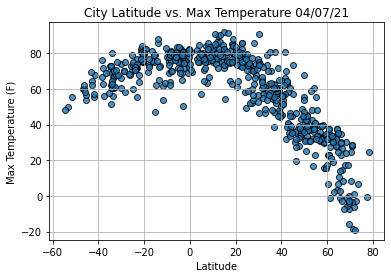

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

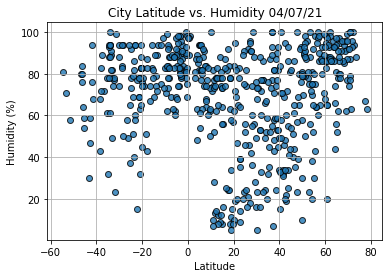

In [12]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

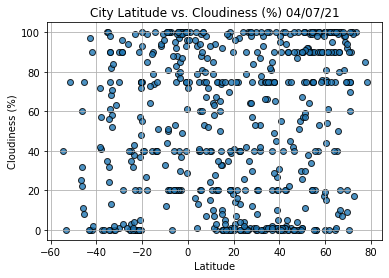

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

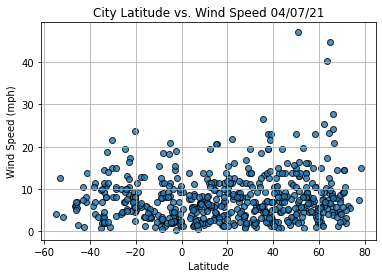

In [14]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [15]:

# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# To create a new DataFrame from a current DataFrame, 
# we can use the loc method on the current DataFrame
index13 = city_data_df.loc[13]
index13

City                       Bethel
Country                        US
Date          2021-04-07 23:19:32
Lat                       41.3712
Lng                       -73.414
Max Temp                     66.2
Humidity                       34
Cloudiness                      1
Wind Speed                  10.36
Name: 13, dtype: object

In [17]:
# Filter a DataFrame based on a value of a row.
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4       True
       ...  
558    False
559    False
560     True
561     True
562     True
Name: Lat, Length: 563, dtype: bool

In [18]:
# Return a DataFrame with all data fitting the criteria, 
# for latitudes greater than or equal to 0, we can use the 
# loc method 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Barrow,US,2021-04-07 23:19:29,71.2906,-156.7887,-18.40,63,90,10.36
3,Provideniya,RU,2021-04-07 23:19:29,64.3833,-173.3000,3.20,66,0,8.95
4,Bogo,PH,2021-04-07 23:19:30,11.0517,124.0055,79.29,74,85,6.62
5,Rio De Jesus,PA,2021-04-07 23:19:30,7.9844,-81.1631,83.37,64,98,6.78
6,Lavrentiya,RU,2021-04-07 23:19:30,65.5833,-171.0000,-1.41,78,50,5.95


In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

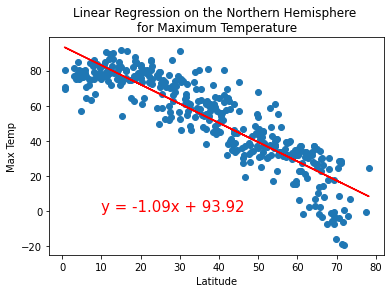

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Northern Hemisphere \nfor Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,0))

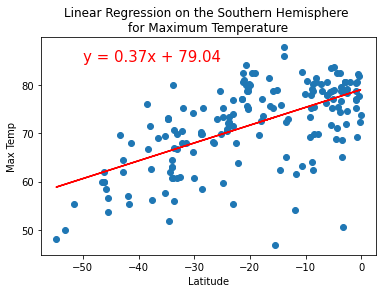

In [21]:

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title("Linear Regression on the Southern Hemisphere \nfor Maximum Temperature")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

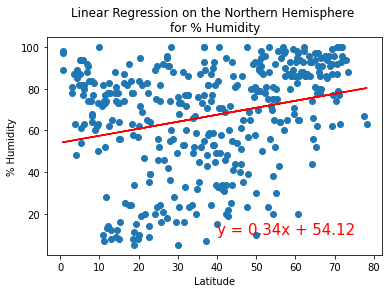

In [22]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title("Linear Regression on the Northern Hemisphere \nfor % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

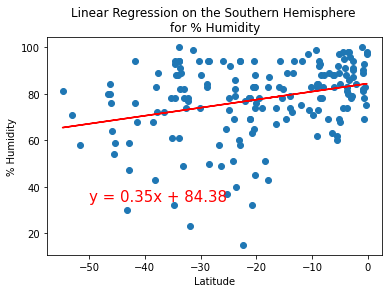

In [23]:

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title("Linear Regression on the Southern Hemisphere \nfor % Humidity")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,34))

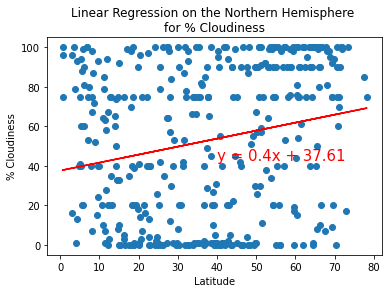

In [24]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Northern Hemisphere \nfor % Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,43))

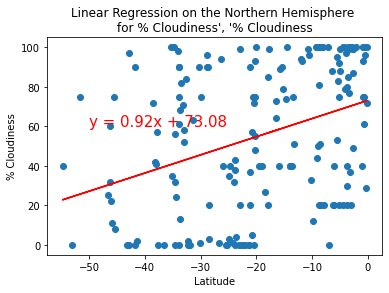

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title("Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

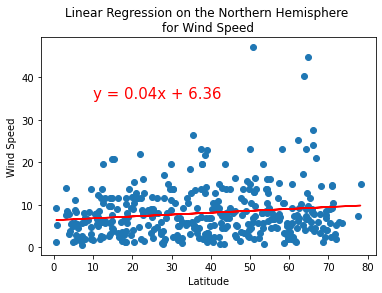

In [26]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \nfor Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,35))

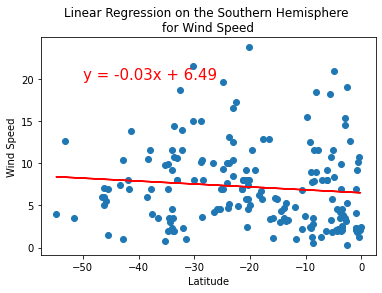

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Southern Hemisphere \nfor Wind Speed")
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))